# Missing Data
## Terminology

Rubin (1976)  is the classic academic piece on missing data. As noted by Rubin (1976, p. 589) "**The inescapable conclusion seems to be that when dealing with real data, the practising statistician should explicitly consider the process that causes missing data far more often than he does. However, to do so, he needs models for this process and these have not received much attention in the statistical literature.**" 

Missing data is quite common; in fact it's rare to have data that aren't missing. When we discussed the Heckman and Tobit models, missing data were presented in terms of ***ignorability***: Is it safe to ignore the missing data generating process and analyze only the observable data, or is there something about this process that needs to be incorporated into the statistical model? With the Heckman and Tobit models, because there was a systematic process that generated the data -- and because this process is correlated with the outcome -- we needed to adjust the model to account for the truncated distribution.

As we'll see, the common way to address missing data, just dropping missing observations, can lead to biased, inefficient, and inconsistent parameter estimates. Most statistical packages simply drop an observation in which data are missing. This is called ***listwise deletion***. The problem with this default approach, is that, again, if there is something systematic regarding the data missingness process, simply dropping observations will produce incorrect parameter estimates. In fact, the only circumstance under which this approach is advisable is if the data are said to be **Missing Completely at Random**.

## An Example

Let's assume we are predicting voting for a conservative political candidate with two variables, income and education. Of the 200 observations in the data, a good number of participants either fail to respond the survey question, or they answer with "Don't Know." We declare these responses as NA, or missing. 

Now, let's assume that we represent the complete data as $y_{complete}=[y_{observed}, y_{missing}]$. The complete data consist of the data we observe, and what we would observe if the missing data were available. Also, assume we have an indicator of whether the $i$th unit is observed or missing on $y$: $I \in \{1,0\}$. Observations that are missing are coded 1, observations that are present are coded 0. 

The joint probability of $y_{complete}$ and $I$ is:

$$p(y_{complete}, I | \theta, \gamma)=p(y|\theta) p(I|y, \gamma)$$

We assume there are parameters predicting $I$ and $y$, which are represented by theta and gamma. We can then factor the joint probabilities into the conditional probabilities of observing $Y$ and observing $I$, right?

Of course, this representation is entirely unrealistic (why?). We do not in fact observe $y_{complete}$ because we do not observe $y_{missing}$. Instead, we only observe a subset of $y$. If we marginalize over $y_{missing}$.

$$p(y_{obs}, I | \theta, \gamma)=\int p(y_{complete}, I|\theta) d y_{miss}$$

$$p(y_{obs}, I | \theta, \gamma)=\int p(I|y, \gamma) p(y|\theta) d y_{miss}$$

It is perfectly fine to ignore the missing data by just averaging over the missing data (like above), but only in a particular circumstance: When the missing data are **Ignorable**. Ignorability must meet two requirements.

$\star$ Data are missing at random (MAR).

For this to hold, we may consider the $ p(I|y, \gamma)$ portion of the equation. Here, 

$$p(I|y_{complete},\phi)=p(I|y_{observed},\phi)$$

The probability of missingness are independent of the missing data. In other words, we can just as reliably determine whether a value will be missing with the observed data, as we could with the observed plus missing data. 

It's useful to think really carefully about this. Assume we want to compare to missing data generating procedures. Assume $y$ is completely observed, but we want to compare the quality of a statistical estimate by dropping data in one of two ways. In one way, we randomly assign twenty five percent of cases with a one or zero. If we observe a 1, we declare $y=NA$. If we then write our likelihood and calculate our parameter estimates, the estimates should be the same as they would be if we estimated the parameters with the complete data. Why?

In this case, 

$$p(I|y_{complete},\phi)=p(I|y_{observed},\phi)$$

The probability of observing a missing response is in fact unrelated to the data, so 

$$p(I|y_{complete},\phi)=p(I|\phi)$$

This is a special case of missing at random, called **Missing Completely at Random** (MCAR). MCAR means the probability that a data point is missing is equal for every unit. Since we will use $\phi$ to denote processes relating to the missing data, and $\theta$ relating to the outcome, what MCAR entails is that $\phi$ -- the probability of missingness -- is the same for each unit.We can think about it as a flip of a (possibly weighted) coin. 

But now think of a somewhat different scenario. Here, you again must declare 25\% of observations to be missing, but you do this by dropping the top quartile of observations -- you just delete all observations that have a $y>y_{75th-percentile}$. 

The data are not missing completely at random, but if we know the missingness process, then 

$$p(I|y_{complete},\phi)=p(I|\phi, y_{observed})$$

The data are only missing at random (and observed at random) given the value of $y$. Thus, we might say that conditional on $y_observed$ the data are missing at random.

The probability that a data point goes missing is now a composite of the score on $y$ and a missingness parameter. We know the probability that y is in fact observed and conditional on this knowledge, we may again model this probability. In this case, we have a censored or truncated variable. 

What this then says is that the probability of the data missing are only missing at random conditional on the score of $y$. This is why missing at random is a difficult concept to grasp. It simply means that if we know something about the missingness process, and we condition our estimates on this, we may assume a non-systematic element to our missing data. Thus, our data are only stochastically missing conditional on the value of $y$. This is still randomly missing, only now it is conditional on y.

Now, consider a third condition: We sort the data on $y$ and we drop stochastically based on whether $y$ exceeds the 50th percentile in the population. Besides knowing that only those observations that exceed the 50th percentile will be dropped, we have no additional information. Now,

$$p(I|y_{complete},\phi)\neq p(I|\phi, y_{observed})$$

Unless we have a priori information about the population distribution.
Now we have a slightly different problem. We certainly cannot ignore the process that generated the missing data. But, is it the case that we can express the problem as MAR? Probably not, because we have no idea why these cases were dropped. We would need to accept the fact that if we were to just ignore the missing data, we most certainly would get biased and inconsistent estimates. It is this problem -- that **I** is somehow systematically related to $y_{miss}$, which is called **Missing Not at Random**. The data have gone systematically missing and there is something systematically occuring in our data that would need to be modeled prior to assuming MAR.

Again, MAR is sometimes difficult to grasp. It does not mean that all observations are equally likely to go missing. It means, conditional on some aspect of the observed data, all observations are equally likely to go missing. From one of the prior examples, conditional on knowing the 75th percentile of $y$ we can model the probability a dataset goes missing.

There is a second component to the ignorability assumption, and that is

$\star$ Missing data parameters are unrelated to the outcome.

Recall our original predicament:

$$p(y_{obs}, I | \theta, \gamma)=\int p(I|y, \gamma) p(y|\theta) d y_{miss}$$

We must be able to assume that:

$p(y|\theta, \gamma)=p(y|\theta)$

Or, the probability of the outcome is unrelated to the process that predicts the missing data. I like to think of this problem as a latent, unobserved parameters.


If we observe more missing data for extreme positive values of $y$, then we violate this assumption. There is a correlation between the missing data and the outcome equation.

Returning to the above examples: In the second and third examples, if we just simply ignore $p_{observed}$ and estimate a model on the truncated data, then this will clearly be violated. The reason is that data are missing that have higher scores on $y$. Or, put another way, if theta and gamma represented some latent score, then those who score higher on the likelihood of having data missing also score higher on the latent score of $y$.



## Solutions
The natural inclination that many scholars have is to just ignore the missing data and run the analysis on observed data. This is called **full case analysis** or **complete case analysis** (Gelman and Hill 2009). Of course, this will only yield correct parameter estimates if the data are MCAR or MAR. **If the data are MCAR then there are no serious implications for ignoring the missing data}. However, dropping the missing data may lead to less precision (i.e., reduced power) because the standard errors will be larger by virtue of a smaller n, holding all else constant.** If the data are MAR, then we need to condition the estimates on those variables that predict missingness.

Simply **listwise deleting** missing cases will produce incorrect parameter estimates because the missing data are somehow related to the data that are missing. Again, it's useful to just think of this problem in terms of the missing data. Would the parameter estimates be drastically different if the missing data were obserevd? Would the results would be different if we were to observe the entire vector of $y_{complete}$

In fact, even dropping data with MCAR or MAR data is ill-advised (particularly if it is a large proportion of the data), since the variance estimates of our sample estimates are a function of the sample size. Thus, as we drop more observations we lose statistical power, holding all else equal.

### Methods that Retain all Data
A far superior approach is **imputation**. The logic here is relatively straightforward: Make an informed guess about what the missing data values might be. One candidate is the mean, another the coniditional mean given x, so let's now assume both a $y$ and an $x$, such that:


In [1]:
x <- rnorm(10000, 0, 1)
y <- 1 + 1*x + rnorm(10000,0,3)

y.observed <- rep(NA, 10000)
y.miss <- sample.int(2,10000, replace=TRUE, prob=c(0.25, 0.75))
for(i in 1:10000){
  y.observed[i]<-ifelse(y.miss[i]==1, NA, y[i])
}
##Fill in missing values of y.observed with mean
y.mean.impute<-ifelse(is.na(y.observed), mean(y.observed, na.rm=T),
                      y.observed)
mean(y.mean.impute)
var(y.mean.impute)
mean(y)
var(y)

[1] 1.02613

[1] 7.490659

[1] 1.025172

[1] 10.01156

The variance is wrong. It's also important to consider how this affects the covariance.

In [2]:
cov(y.mean.impute, x)
cov(y, x)

[1] 0.7335106

[1] 0.9658878

In [4]:

x<-rnorm(10000, 0, 1)
y<-1+1*x+rnorm(10000,0,3)
y.observed<-rep(NA, 10000)
y.miss<-sample.int(2,10000, replace=TRUE, prob=c(0.25, 0.75))
for(i in 1:10000){
  y.observed[i]<-ifelse(y.miss[i]==1, NA, y[i])
}
missing.model<-lm(y.observed~x) ##lm listwise deletes
y.cm.impute<-rep(NA, 10000)
for(i in 1:100){
  y.cm.impute[i]<-ifelse(is.na(y.observed[i]), 
                        coef(missing.model)[1]+
                          coef(missing.model)[2]*x[i],
                        y[i])
}  
summary(lm(y~x))
summary(lm(y.mean.impute~x))
summary(lm(y.cm.impute~x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.9259  -2.0302   0.0107   1.9944  12.8114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.01506    0.03015   33.67   <2e-16 ***
x            0.93405    0.02996   31.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.014 on 9998 degrees of freedom
Multiple R-squared:  0.08859,	Adjusted R-squared:  0.0885 
F-statistic: 971.8 on 1 and 9998 DF,  p-value: < 2.2e-16



Call:
lm(formula = y.mean.impute ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1970  -1.3706  -0.0001   1.3437  12.8559 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.02663    0.02737  37.506   <2e-16 ***
x           -0.02947    0.02720  -1.083    0.279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.737 on 9998 degrees of freedom
Multiple R-squared:  0.0001174,	Adjusted R-squared:  1.738e-05 
F-statistic: 1.174 on 1 and 9998 DF,  p-value: 0.2787



Call:
lm(formula = y.cm.impute ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8809 -1.2500  0.2316  0.8108  7.0151 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7694     0.2390   3.220 0.001741 ** 
x             0.9042     0.2302   3.928 0.000159 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.388 on 98 degrees of freedom
  (9900 observations deleted due to missingness)
Multiple R-squared:  0.136,	Adjusted R-squared:  0.1272 
F-statistic: 15.43 on 1 and 98 DF,  p-value: 0.0001594


We could extend this to the conditional mean. Now things start to improve; our parameters in the population start to look more similar to the parameter estimates in the sample, and we haven't dropped any observations. The problem, however, is that there is no uncertainty in our imputation. In other words, we view all observed data as a distribution $E(Y|X)$, but there is no uncertainty regarding the predicted values. 

This has the implication of underestimating the variance-covariance matrix of the errors, because the imputed values do not reflect uncertainty. 

These solutions all rely on relatively strong and difficult to maintain assumptions. And the assumption is the missing data are predicted without uncertainty. This is unrealistic, since the observed data -- which again, we directly observe -- are modeled with uncertainty. So, how can it conceivably be the case that the observed data are uncertain, but the unobserved predictions are modeled with absolute certainty? Although the above approaches seem reasonable, we need to extend it a bit further to account for uncertainty in the imputed values, similar to how we observe uncertainty in the predicted values of the observed data.


Why does this happen? If the variance of the OLS estimator is,

$$var(y|x)=\sigma^2=E[(y|x-E(y|x))^2]$$

But, the $E(y|x)$ does not equal $E(y)$ across levels of $x$.  And for the same reason, the estimate of the covariance will be wrong, because our expected value of $y$ is really not $\bar{y}$ across values of $x$. Thus, you should see that mean imputation -- while it is approaching an acceptable solution -- is still problematic.

## Other Single Point Methods
We can call mean imputation a single point imputation method, because we assume that a missing value takes on a single value. Another option is to generate some search function that only imputes the missing value given that scores on other covariates are the same. This is called \emph{Hot Deck Imputation}. For instance, if we have a missing observation for a mother who is 35 with 2 children and lives in Alabama, we might find a case of a mother who is approximately 35 with 2 children also living in Alabama and then fill in the missing value with this observed value. In short, we match on a case that is similar. The logic underlying Hot Deck is actually quite similar to the matching paradigm we explored last week. We could use the logic of propensity score matching to find a suitable value of $y_{missing}$ for individuals who score similar on the propensity score. Here, instead of the propensity score indicating treatment, it now represents missingness.

If we are dealing with a categorical variable, sometimes scholars will create an additional category corresponding to missingness or don't know. Thus, we do not need to disgard the data, but we may predict the likelihood of missingness. Note how this is qualitatively different, however, from assuming the missing data points have a latent value and then we predict this latent value.

Sometimes missing values on continuous predictors are declared as zeros or reside on the midpoint. This is commonly done in behavioral research, where an indicator like ideology and/or party identification are declared to have a midpoint that consist of moderates/independents/missing.



## Multiple Imputation
The above single point methods are examples of **deterministic imputation**, as we simply observe $x$ and predict $y$ with no uncertainty. In fact, what would be better is to represent uncertainty in our predictions. If you recall the earlier lectures on incorporating uncertainty into our parameter estimates, this is essentially the logic underlying mean imputation. Recall that uncertainty in our estimates may be represented with the regression error, $var(\epsilon_i)$. In the case of linear regression, this is captured with $\sigma^2$, which is estimated. In some of the other models, we make an assumption about this error (e.g., that it is 1 in probit), but in all cases, there is error. The logic of multiple imputation is that we use this error to condition uncertainty about our predicted values. The logic of multiple imputation (MI) includes an error component, alongside the conditional prediction of $y$. MI proceeds in a series of steps:

(1) Estimate the regression model on the observed data. Save the estimates and the variance of the errors.

(2) Draw $m$ values from a multivariate normal, based on the model estimates and the variance in (1), 

(3) Save the full data set of observed and imputed data in (2). Call this data set $m_i$. In total, you will have $m$ unique data sets.

(4) Estimate your statistical model on the $m$ unique datasets.

(5) Combine the results by averaging the estimates. (See the Gelman chapter).




In [46]:
rm(list=ls())
library(mice)
load("/users/chrisweber/Dropbox/Working Projects/Authoritarianism_BookProject/Data/Voter2016.RData")
my.dat <- subset(full.data, select=c("egal1", "egal2", "egal3", "egal4"))
tempData <- mice(my.dat,m=5,maxit=50,meth='pmm',seed=500)



 iter imp variable
  1   1  egal1  egal2  egal3  egal4
  1   2  egal1  egal2  egal3  egal4
  1   3  egal1  egal2  egal3  egal4
  1   4  egal1  egal2  egal3  egal4
  1   5  egal1  egal2  egal3  egal4
  2   1  egal1  egal2  egal3  egal4
  2   2  egal1  egal2  egal3  egal4
  2   3  egal1  egal2  egal3  egal4
  2   4  egal1  egal2  egal3  egal4
  2   5  egal1  egal2  egal3  egal4
  3   1  egal1  egal2  egal3  egal4
  3   2  egal1  egal2  egal3  egal4
  3   3  egal1  egal2  egal3  egal4
  3   4  egal1  egal2  egal3  egal4
  3   5  egal1  egal2  egal3  egal4
  4   1  egal1  egal2  egal3  egal4
  4   2  egal1  egal2  egal3  egal4
  4   3  egal1  egal2  egal3  egal4
  4   4  egal1  egal2  egal3  egal4
  4   5  egal1  egal2  egal3  egal4
  5   1  egal1  egal2  egal3  egal4
  5   2  egal1  egal2  egal3  egal4
  5   3  egal1  egal2  egal3  egal4
  5   4  egal1  egal2  egal3  egal4
  5   5  egal1  egal2  egal3  egal4
  6   1  egal1  egal2  egal3  egal4
  6   2  egal1  egal2  egal3  egal4
  6   3 

In [43]:
ls(tempData)

[1] "blocks"          "blots"           "call"            "chainMean"      
 [5] "chainVar"        "data"            "date"            "formulas"       
 [9] "ignore"          "imp"             "iteration"       "lastSeedValue"  
[13] "loggedEvents"    "m"               "method"          "nmis"           
[17] "post"            "predictorMatrix" "seed"            "version"        
[21] "visitSequence"   "where"

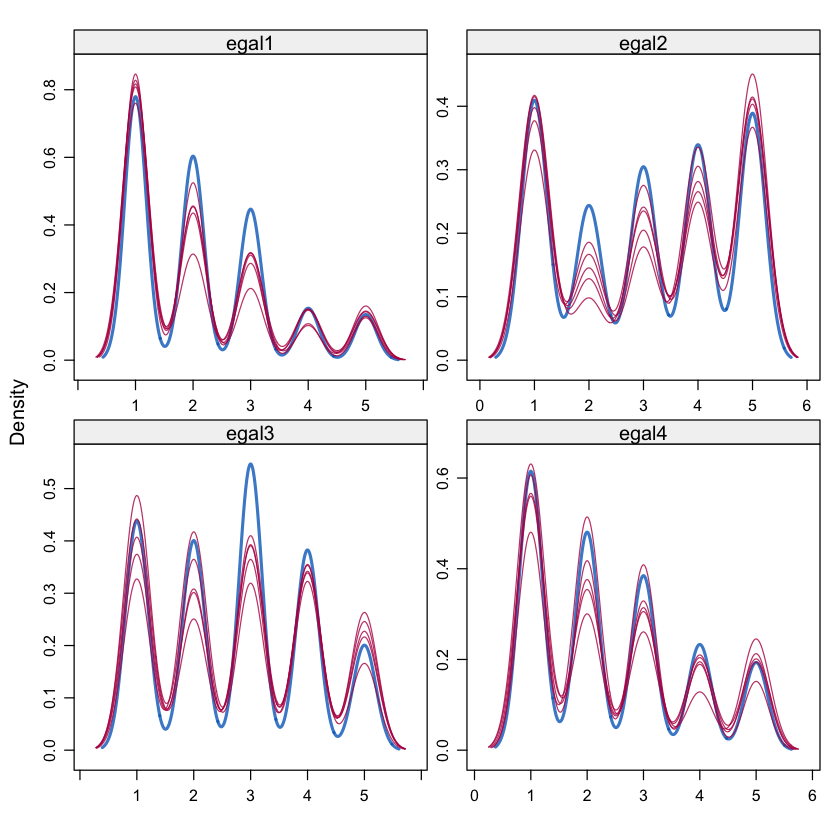

In [17]:
densityplot(tempData)


The density of the true data (blue) should be similar to the predicted data (why?). In this case, the imputation method performed reasonably well, particularly given the scarcity of information -- provided by the common variance between these survey items and/or that the imputation isn't based on many variables. In any case, we can also pool our estimates -- here we're just regressing egal1 on egal2 and pooling the estimates.

In [45]:
tempData
model <- with(tempData,lm(egal1~ egal2))
summary(pool(model))

Class: mids
Number of multiple imputations:  5 
Imputation methods:
egal1 egal2 egal3 egal4 
"pmm" "pmm" "pmm" "pmm" 
PredictorMatrix:
      egal1 egal2 egal3 egal4
egal1     0     1     1     1
egal2     1     0     1     1
egal3     1     1     0     1
egal4     1     1     1     0

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.0424487,0.09774170,10.665342,4.544098,0.0002184101
egal2,0.3597838,0.03730272,9.644975,4.272407,0.0004658776
